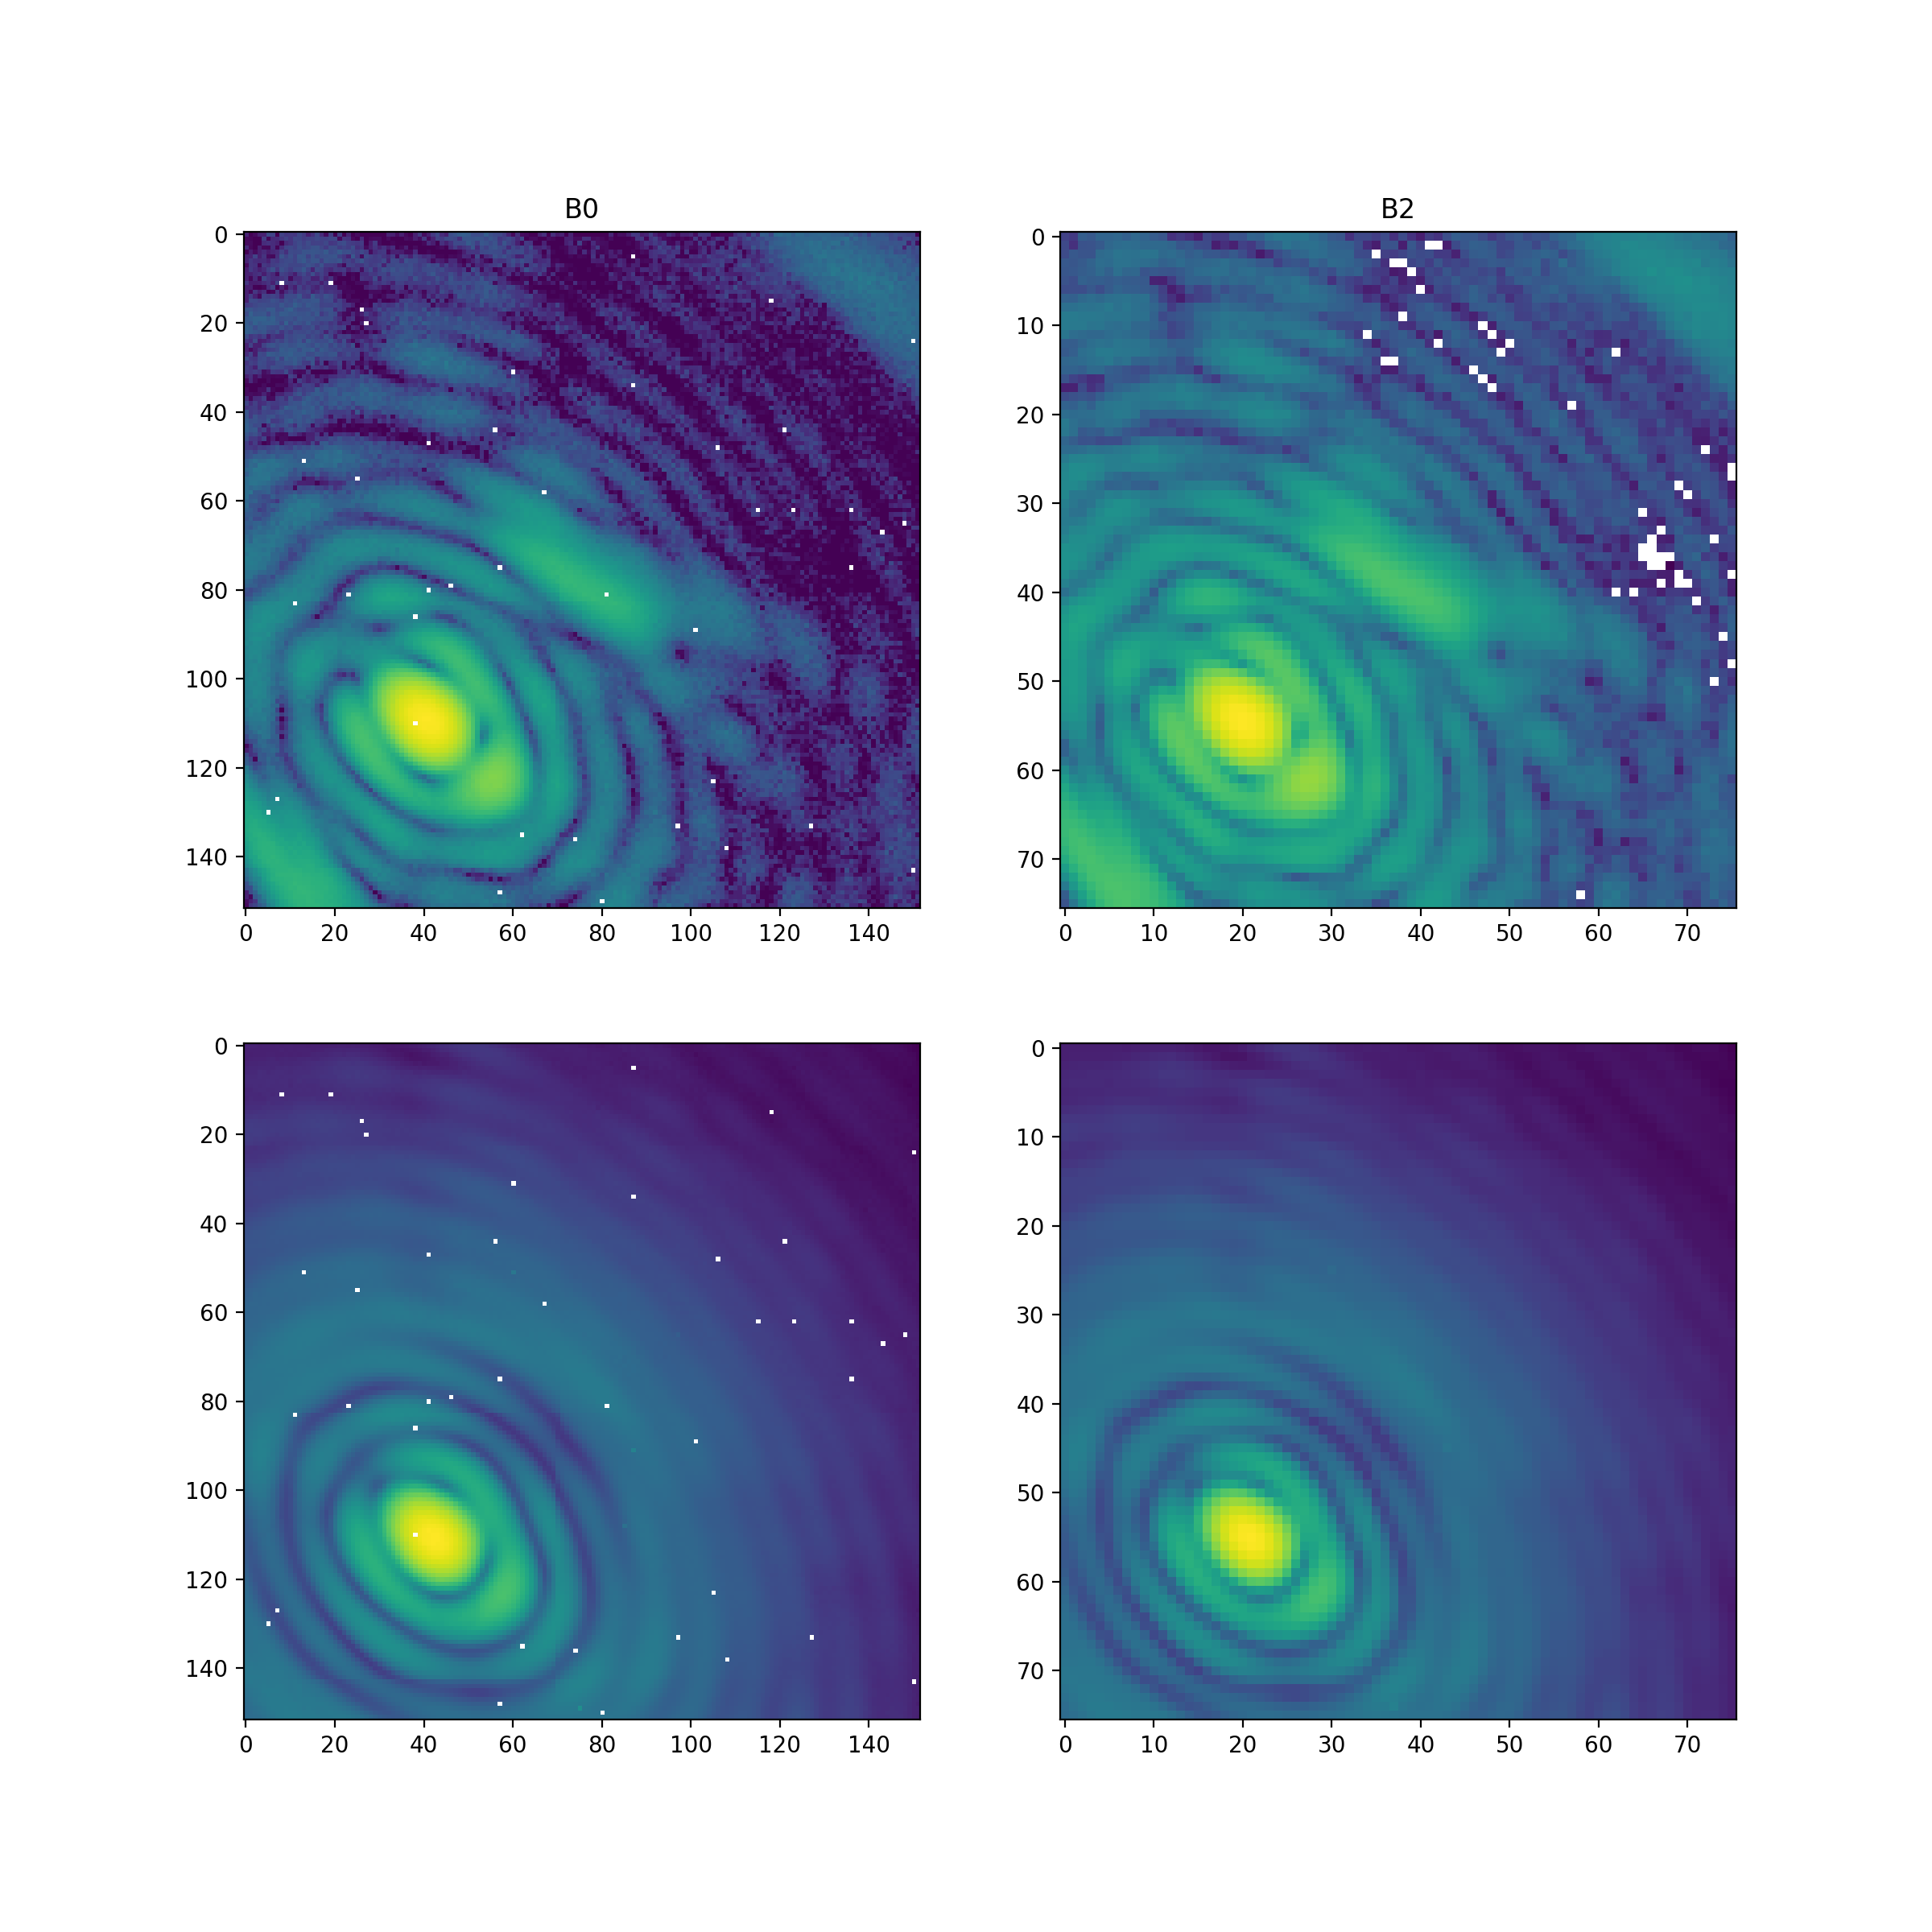

In [83]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt 
import os
from matplotlib.colors import LogNorm

path = "/ibira/lnls/beamlines/caterete/apps/gcc-jupyter/00000000/proc/recons/SS03112022_02"
folder = ["B0","B2"]#,"B4"]


# file1 = "04_difpad_restaured.npy"
# file2 = "04_difpad_restaured_mean.npy"
file1 = "05_difpad_processed.npy"
file2 = "05_difpad_processed_mean.npy"

percentage = 0.03

fig, ax = plt.subplots(2,2,figsize=(12,12),dpi=200)
for i in range(len(folder)):
    
    DP = np.load(os.path.join(path,folder[i],file1))
    DP_mean = np.load(os.path.join(path,folder[i],file2))

    cx, cy = DP.shape[1]//2, DP.shape[0]//2
    percentage2 = 0.035
    # cx -= int(DP.shape[1]//2*percentage2)
    # cy += int(DP.shape[0]//2*percentage2)
    roix, roiy = int(percentage*DP.shape[1]), int(percentage*DP.shape[0])

    if percentage != 0:
        DP = DP[cy-roiy:cy+roiy,cx-roix:cx+roix]
        DP_mean = DP_mean[cy-roiy:cy+roiy,cx-roix:cx+roix]

    ax[0,i].imshow(DP,norm=LogNorm()), ax[0,i].set_title(folder[i])
    ax[1,i].imshow(DP_mean,norm=LogNorm())
    
    
    

In [72]:
pixels_to_paint[pixels_to_paint] = 10
pixels_to_paint

array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  1,  1,  0],
       [ 0,  0,  0, ...,  1,  1,  0],
       [ 0,  0,  0, ...,  1,  1,  0]])

In [78]:
pixels_to_paint

array([[0, 1, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [77]:
DP_mean_corrected[pixels_to_paint] = 1
DP_mean, DP_mean_corrected

(array([[0.00178137, 0.        , 0.0018844 , ..., 0.00173765, 0.00177253,
         0.00140748],
        [0.00347503, 0.00168408, 0.00200332, ..., 0.00274053, 0.00470335,
         0.00294471],
        [0.        , 0.        , 0.00180253, ..., 0.        , 0.00146648,
         0.        ],
        ...,
        [0.        , 0.00478916, 0.        , ..., 0.01191669, 0.00736612,
         0.00400382],
        [0.        , 0.00352883, 0.        , ..., 0.00609471, 0.00774945,
         0.00971441],
        [0.00366428, 0.00214705, 0.00182404, ..., 0.00719002, 0.00356685,
         0.00600863]], dtype=float32),
 array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [0.        , 0.        , 0.00180253, ..., 0.        , 0.00146648,
         0.        ],
        ...,
        [0.        , 0.00478916, 0.        , ..., 0.01191669, 0.00736612,
         0.00400382

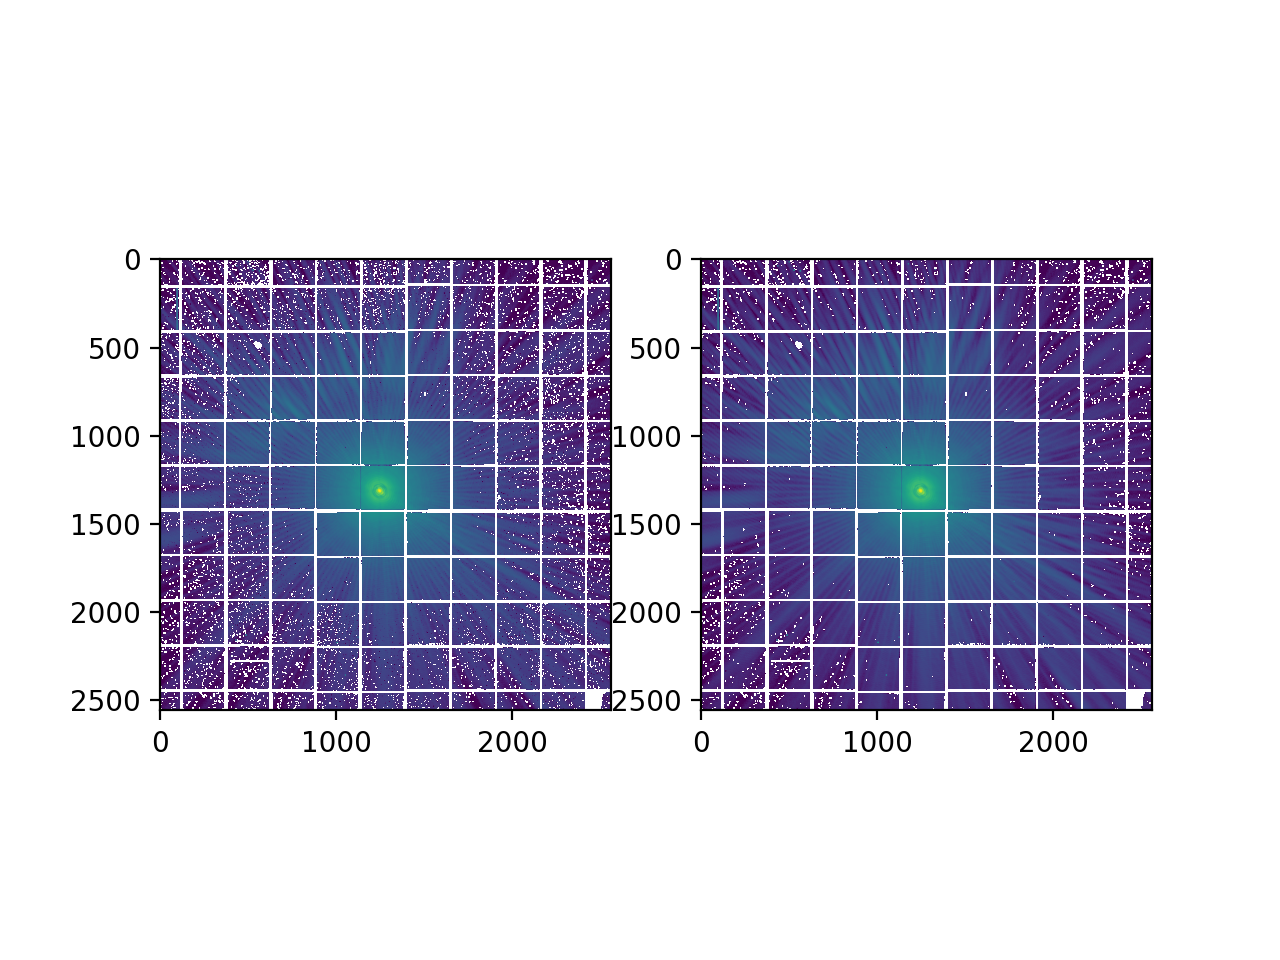

In [80]:

def inpaint_lonely_neighbors(DP_mean):
    valids_mask = np.where(DP_mean > 0 , 1 , -1)
    sum_of_mask_neighbors = np.roll(valids_mask,1,0) + np.roll(valids_mask,-1,0) + np.roll(valids_mask,1,1) + np.roll(valids_mask,-1,1) + np.roll(np.roll(valids_mask,1,0),1,1) + np.roll(np.roll(valids_mask,1,0),-1,1) + np.roll(np.roll(valids_mask,-1,0),1,1) + np.roll(np.roll(valids_mask,-1,0),-1,1)
    sum_of_neighbors = np.roll(DP_mean,1,0) + np.roll(DP_mean,-1,0) + np.roll(DP_mean,1,1) + np.roll(DP_mean,-1,1) + np.roll(np.roll(DP_mean,1,0),1,1) + np.roll(np.roll(DP_mean,1,0),-1,1) + np.roll(np.roll(DP_mean,-1,0),1,1) + np.roll(np.roll(DP_mean,-1,0),-1,1)
    pixels_to_paint = np.where(sum_of_mask_neighbors == 8,True,False)
    DP_mean_corrected = DP_mean.copy()
    DP_mean_corrected[pixels_to_paint] = sum_of_neighbors[pixels_to_paint] / 8
    return DP_mean_corrected

fig, ax = plt.subplots(1,2,dpi=200)
ax[0].imshow(DP_mean,norm=LogNorm())
ax[1].imshow(DP_mean_corrected,norm=LogNorm())